In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Дерево:
Постройте дерево принятия решений на заданном наборе данных.
Визуализируйте полученное дерево.
Постройте график зависимости качества классификации от глубины дерева принятия решений на тестовой и тренировочной части набора данных.
Случайный лес:
Постройте график зависимости качества классификации от числа деревьев на тестовой и тренировочной части набора данных.
Визуализируйте, как всё пространство классифицируется алгоритмом для разного числа деревьев. Должно получиться несколько картинок. Не обязательно строить картинки для каждого шага. Можно выбрать несколько “интересных” номеров итераций, например: 1, 2, 3, 5, 8, 13, 21, 34 …


In [40]:
sample_submission_df = pd.read_csv('data\\chips.csv')

sample_X = sample_submission_df[['x', 'y']]
sample_Y = sample_submission_df['class']
sample_Y

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: class, Length: 118, dtype: int64

In [41]:
def draw_dclf(inp_clf):
    dot_data = export_graphviz(inp_clf, out_file=None,
                               feature_names=list(X_train.columns.values),
                               class_names=["0", "1"],
                               filled=True, rounded=True,
                               )
    graph = graphviz.Source(dot_data)
    return graph

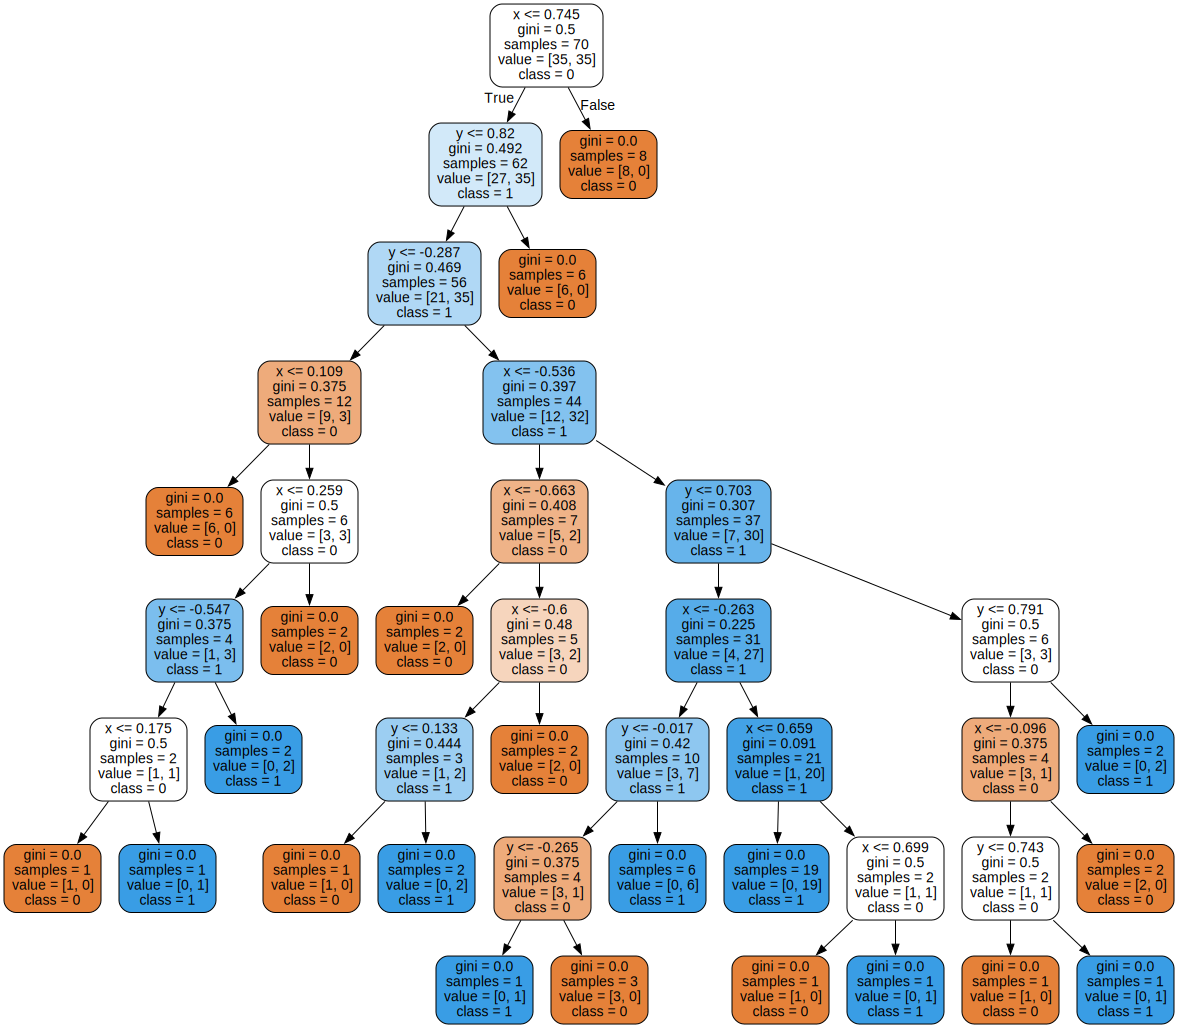

In [42]:
from sklearn.metrics import confusion_matrix
import graphviz
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_Y, test_size=0.4, random_state=0)
clf.fit(X_train, y_train)
y_pred_all = clf.predict(X_test)
draw_dclf(inp_clf=clf)

MAX ACC  :  0.7666666666666667
MAX DEPTH:  7


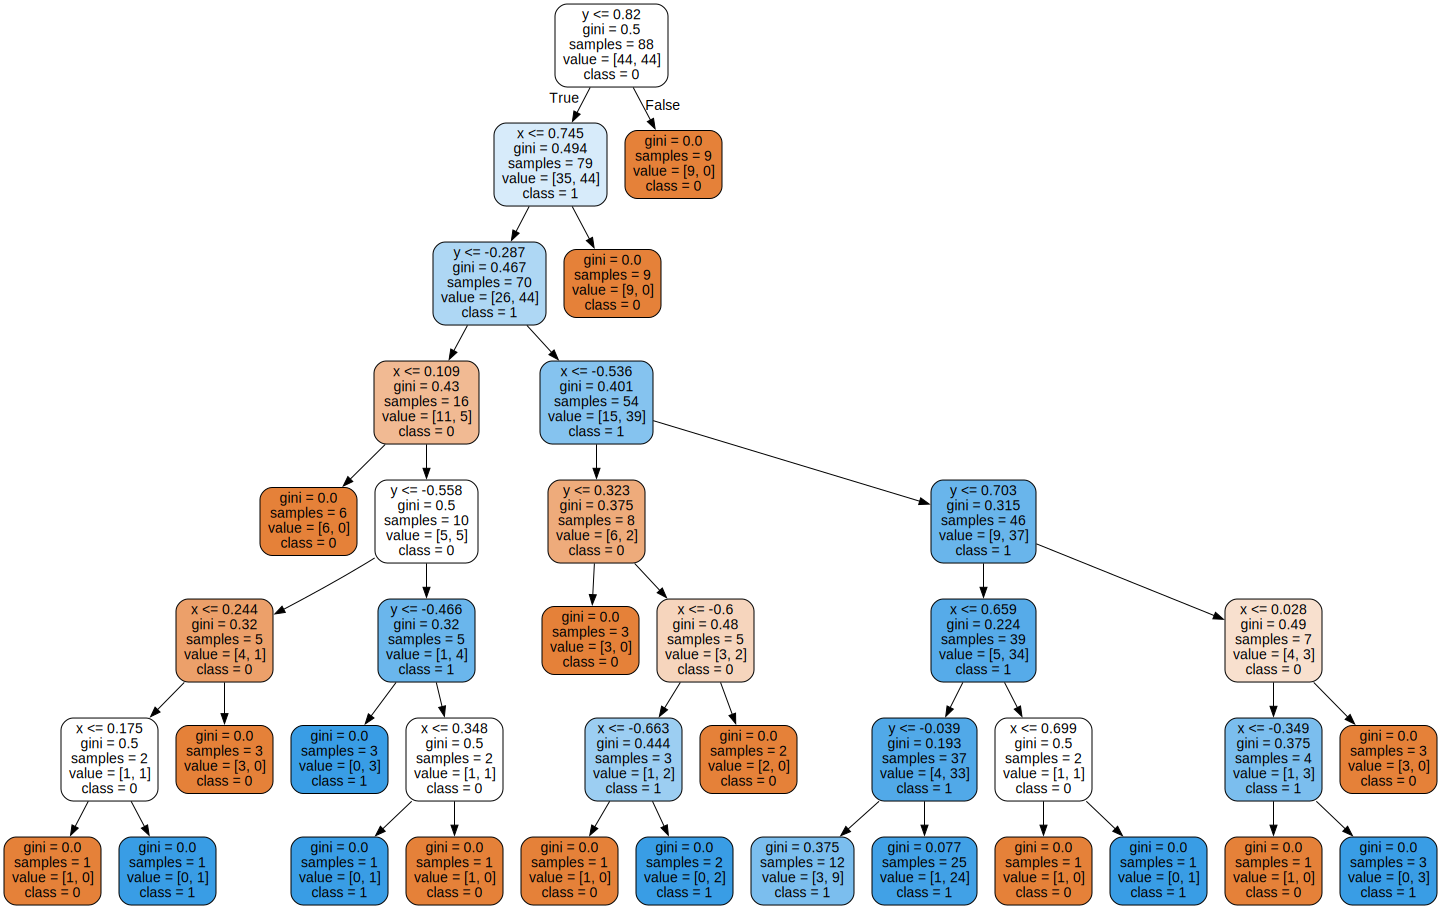

In [43]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_Y, test_size=0.25, random_state=0)

a = 1
b = 40
acc = []
max_clf = None
max_acc = 0
max_calc_depth = 0
for i in range(a, b):
    clf = DecisionTreeClassifier(random_state=0, max_depth=i)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    res = confusion_matrix(y_test, pred)
    curr_acc = (res[0][0] + res[1][1]) / sum(res[0] + res[1])
    acc.append(curr_acc)

    if curr_acc >= max_acc:
        max_clf = clf
        max_acc = curr_acc
        max_calc_depth = i

print("MAX ACC  : ", max_acc)
print("MAX DEPTH: ", max_calc_depth)
draw_dclf(inp_clf=max_clf)


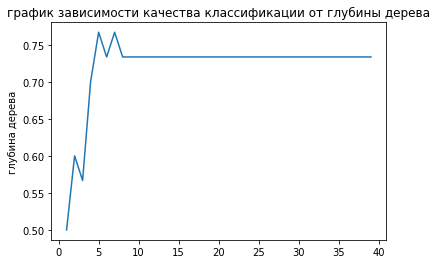

In [44]:
plt.title("график зависимости качества классификации от глубины дерева")
plt.plot([int(i) for i in range(a, b)], acc)
plt.ylabel("глубина дерева")
plt.show()

In [45]:
from mlxtend.plotting import plot_decision_regions
draw_indexes = [1, 2, 3, 5, 8, 13, 21, 34, 50]

def randTreeCalc(curr_clf, clf_name):
    X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_Y, test_size=0.25, random_state=0)
    a = 1
    b = 50
    acc = []
    for i in range(a, b):
        clf = curr_clf(random_state=0, n_estimators=i)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)

        res = confusion_matrix(y_test, pred)
        curr_acc = (res[0][0] + res[1][1]) / sum(res[0] + res[1])
        acc.append(curr_acc)

        if i in draw_indexes:
            plot_decision_regions(np.array(sample_X), np.array(sample_Y), clf=clf, legend=2)
            plt.title(clf_name + " | n_estimators=" + str(i) + " | acc=" + str(curr_acc))
            plt.show()

    return acc, [int(i) for i in range(a, b)]

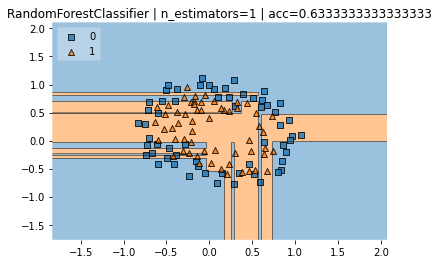

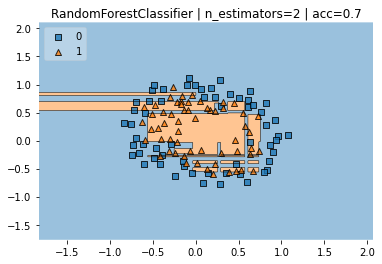

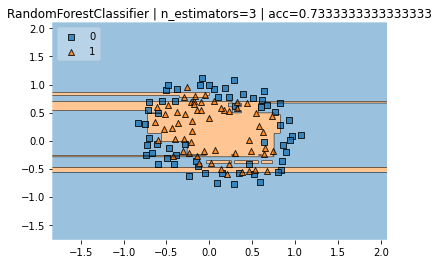

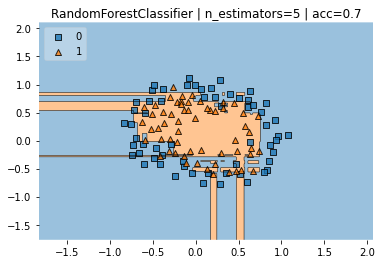

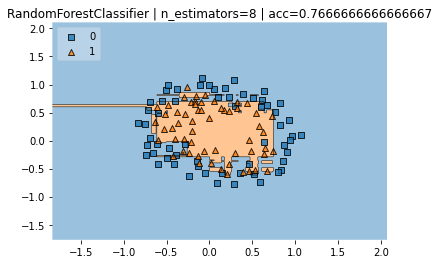

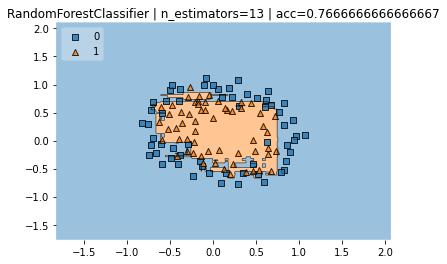

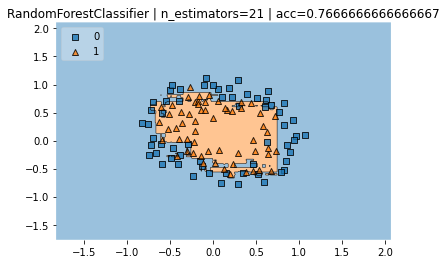

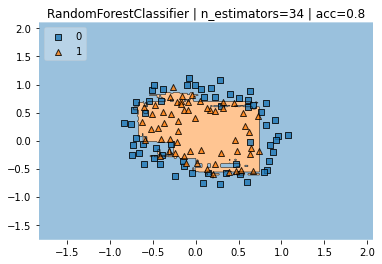

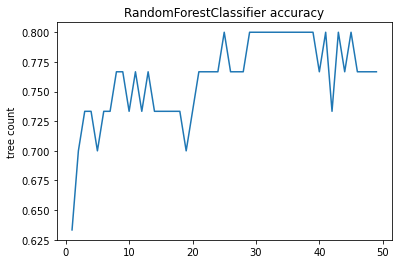

In [46]:
from sklearn.ensemble import RandomForestClassifier

acc_list, count_list = randTreeCalc(RandomForestClassifier, "RandomForestClassifier")

plt.plot(count_list, acc_list)
plt.title("RandomForestClassifier accuracy")
plt.ylabel("tree count")
plt.show()

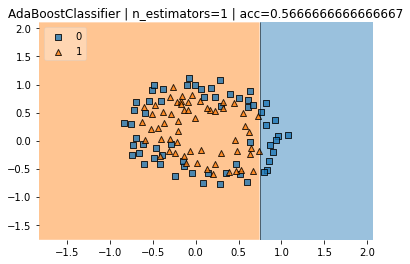

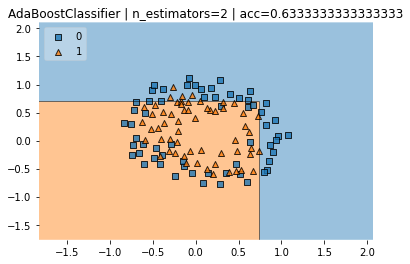

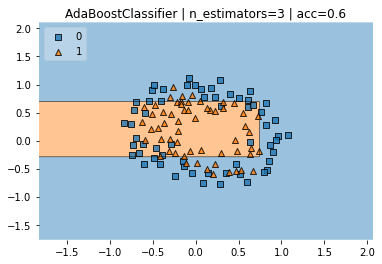

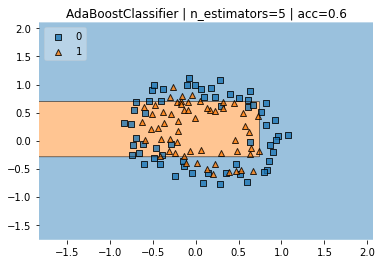

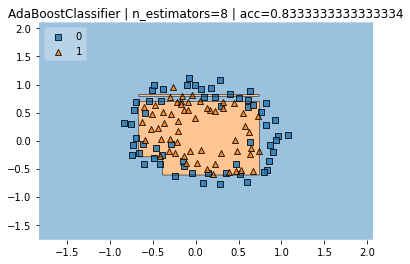

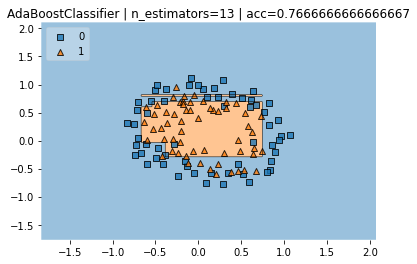

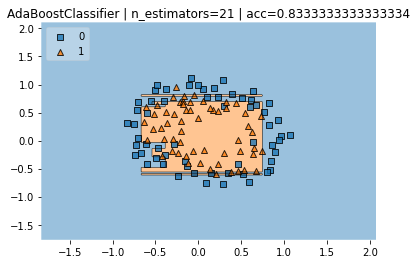

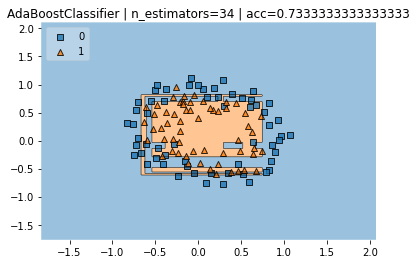

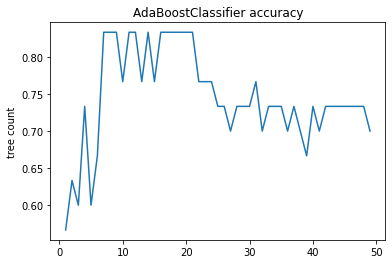

In [47]:
from sklearn.ensemble import AdaBoostClassifier

acc_list, count_list = randTreeCalc(AdaBoostClassifier, "AdaBoostClassifier")

plt.plot(count_list, acc_list)
plt.title("AdaBoostClassifier accuracy")
plt.ylabel("tree count")
plt.show()